In [1]:
import rasterio
import numpy as np
from rasterio.plot import show
from glob import glob
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

In [2]:
path_4nov = r"C:\Users\admin\OneDrive - IIRS\Desktop\imagery analyst\S2\S2C_MSIL2A_20251104T053041_N0511_R105_T43RFM_20251104T092410.SAFE"
path_9nov = r"C:\Users\admin\OneDrive - IIRS\Desktop\imagery analyst\S2\S2B_MSIL2A_20251109T052939_N0511_R105_T43RGM_20251109T163718.SAFE"

In [3]:
b04_4nov = glob(f"{path_4nov}/**/*B04_10m.jp2", recursive=True)[0]
b08_4nov = glob(f"{path_4nov}/**/*B08_10m.jp2", recursive=True)[0]
b04_9nov = glob(f"{path_9nov}/**/*B04_10m.jp2", recursive=True)[0]
b08_9nov = glob(f"{path_9nov}/**/*B08_10m.jp2", recursive=True)[0]

In [4]:
scale_factor = 6

def compute_ndvi(red_path, nir_path):
    with rasterio.open(red_path) as r, rasterio.open(nir_path) as n:
        new_height = r.height // scale_factor
        new_width = r.width // scale_factor
        
        red = r.read(
        1,
        out_shape=(new_height, new_width),
        resampling=Resampling.average
    ).astype("float32")
        
        nir = n.read(
        1,
        out_shape=(new_height, new_width),
        resampling=Resampling.average
    ).astype("float32")
        
        ndvi = (nir - red) / (nir + red + 1e-6)
        profile = r.profile
        profile.update(dtype='float32', count=1)
    return ndvi, profile


In [5]:
ndvi_4nov, profile = compute_ndvi(b04_4nov, b08_4nov)
ndvi_9nov, _ = compute_ndvi(b04_9nov, b08_9nov)
change = ndvi_9nov - ndvi_4nov

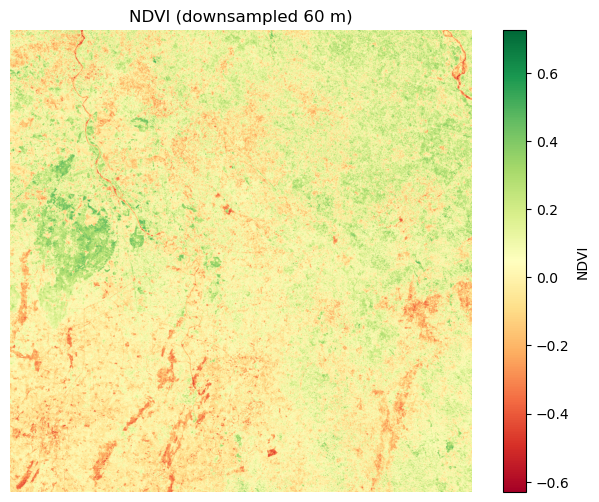

In [10]:

plt.figure(figsize=(8, 6))
plt.imshow(change, cmap="RdYlGn")
plt.colorbar(label="NDVI")
plt.title("NDVI (downsampled 60 m)")
plt.axis("off")
plt.savefig("change S2", dpi = 300)
plt.show()

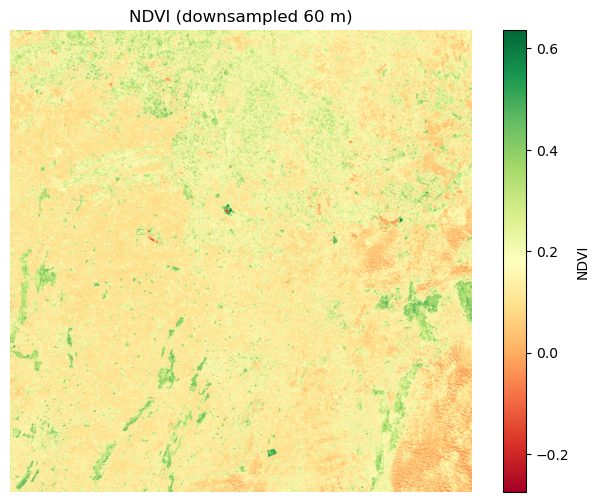

In [14]:

plt.figure(figsize=(8, 6))
plt.imshow(ndvi_4nov, cmap="RdYlGn")
plt.colorbar(label="NDVI")
plt.title("NDVI (downsampled 60 m)")
plt.axis("off")
plt.savefig("ndvi_4nov", dpi = 300)
plt.show()

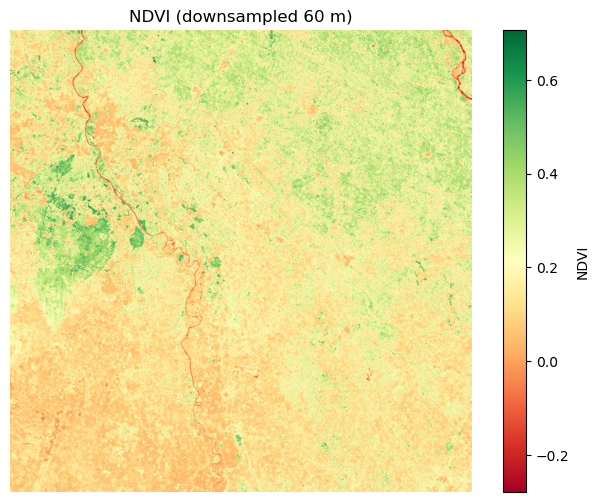

In [13]:

plt.figure(figsize=(8, 6))
plt.imshow(ndvi_9nov, cmap="RdYlGn")
plt.colorbar(label="NDVI")
plt.title("NDVI (downsampled 60 m)")
plt.axis("off")
plt.savefig("ndvi_9nov", dpi = 300)
plt.show()

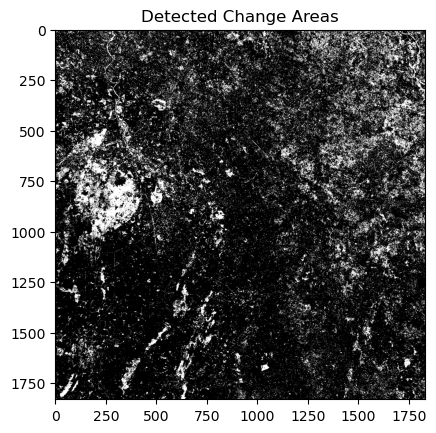

In [9]:
threshold = 0.2
change_mask = np.zeros_like(change)
change_mask[np.abs(change) > threshold] = 1
plt.imshow(change_mask, cmap='gray')
plt.title("Detected Change Areas")
plt.savefig("change_mask S2", dpi = 300)
plt.show()

In [ ]:
plt.savefig(change_mask, dpi = 300)